# **Decision Tree**
Tipo específico de diagrama de flujo que se utiliza para categorizar o realizar predicciones en base a las diferentes características del conjunto de datos.


Importar los módulos necesarios para el desarrollo de un modelo de árbol de decisión.

In [2]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

Se leen los datos del dataframe

In [10]:
df = pandas.read_csv('drug200.csv')
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


Representar los valores alfanuméricos del dataset en numéricos mediante la técnica básica de remplazo de valores.

In [11]:
d1 = {'F': 1, 'M': 2}
df['Sex'] = df['Sex'].map(d1)
d2 = {'HIGH': 1, 'NORMAL': 2, 'LOW':3}
df['BP'] = df['BP'].map(d2)
d3 = {'HIGH': 1, 'NORMAL': 2}
df['Cholesterol'] = df['Cholesterol'].map(d3)
d4 = {'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5}
df['Drug'] = df['Drug'].map(d4)
print(df)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    1   1            1   25.355     5
1     47    2   3            1   13.093     3
2     47    2   3            1   10.114     3
3     28    1   2            1    7.798     4
4     61    1   3            1   18.043     5
..   ...  ...  ..          ...      ...   ...
195   56    1   3            1   11.567     3
196   16    2   3            1   12.006     3
197   52    2   2            1    9.894     4
198   23    2   2            2   14.020     4
199   40    1   3            2   11.349     4

[200 rows x 6 columns]


Se elige las características, es decir, columnas de las que intentamos predecir. Se deben elegir las columnas que aportarán más
al objetivo del modelo.

In [12]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[features]
y = df['Drug']
print(X, y, sep='\n\n')

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    1   1            1   25.355
1     47    2   3            1   13.093
2     47    2   3            1   10.114
3     28    1   2            1    7.798
4     61    1   3            1   18.043
..   ...  ...  ..          ...      ...
195   56    1   3            1   11.567
196   16    2   3            1   12.006
197   52    2   2            1    9.894
198   23    2   2            2   14.020
199   40    1   3            2   11.349

[200 rows x 5 columns]

0      5
1      3
2      3
3      4
4      5
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64


Crear un árbol de decisiones utilizando DecisionTreeClassifier6 de la librería sklearn. Mediante método “fit” construya un
clasificador de árbol de decisión a partir del conjunto de entrenamiento (X, y).

In [13]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

Se *Guarda* el árbol de decisiones como una imagen utilizando pydotplus.

In [14]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('drugdecisiontree.png')

True

Finalmente se obtiene y se visualiza el árbol de decisión utilizando la librería matplotlib

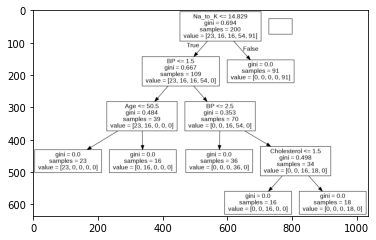

In [15]:
img = pltimg.imread('drugdecisiontree.png')
imgplot = plt.imshow(img)
plt.show()